In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
train_data = pd.read_csv('problem_2_train.csv',  parse_dates=['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'])
train_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [3]:
train_data.shape

(6250, 16)

<h2>Catagorical data</h2>

In [4]:
claims = {'ADLD': 0, 'EW': 1}
train_data['claimtype'] = train_data['claimtype'].map(claims)

In [5]:
x = train_data.mobmake.unique()
mobiles = {}
i = 0
for mob in x:
    mobiles[mob] = i
    i+=1
train_data['mobmake'] = train_data['mobmake'].map(mobiles)

In [6]:
custpin = {'A': 0, 'B': 1, 'C': 2, 'D': 3, '0': 4}
train_data['custpincodecategory'] = train_data['custpincodecategory'].map(custpin)

<h2>Setting date values with dates</h2>

In [7]:
train_data['memcreateddate'] = train_data['memcreateddate'].dt.day
train_data['mobilepurchasedate'] = train_data['mobilepurchasedate'].dt.day
train_data['claimintdate'] = train_data['claimintdate'].dt.day
train_data['pickupStartdate'] = train_data['pickupStartdate'].dt.day

In [8]:
train_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,0,7,500004,233,233,131,0,0,500001,27,2,8,4403,13,5
1,2838330,1,10,226010,233,233,131,0,0,226022,6,5,4,4444,8,12
2,2835781,1,2,110018,233,233,228,0,0,110018,1,27,3,4388,12,9
3,2838589,2,2,110018,233,233,228,1,0,124001,17,31,4,4092,14,9
4,2855214,0,21,110015,233,233,131,0,0,201301,23,20,9,4580,14,8


In [9]:
new_col = abs(train_data['pickupStartdate'] - train_data['claimintdate'])
train_data.insert(15,'TAT',new_col,True)

In [10]:
train_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,TAT,tat_in_days
0,2851218,0,7,500004,233,233,131,0,0,500001,27,2,8,4403,13,5,5
1,2838330,1,10,226010,233,233,131,0,0,226022,6,5,4,4444,8,4,12
2,2835781,1,2,110018,233,233,228,0,0,110018,1,27,3,4388,12,9,9
3,2838589,2,2,110018,233,233,228,1,0,124001,17,31,4,4092,14,10,9
4,2855214,0,21,110015,233,233,131,0,0,201301,23,20,9,4580,14,5,8


<h2>Training the train_data using Linear Regression</h2>

In [11]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

<h3>Feature Selection using SelectKBest library</h3>

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = train_data.iloc[:,0:16]
y = train_data.iloc[:,-1]   

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  

                  Specs         Score
9           custpincode  1.478647e+07
3            hubpincode  1.383064e+07
0                  srno  5.505007e+05
1               mobmake  4.268939e+03
13        servicecntrid  1.949402e+03
8             claimtype  1.604200e+03
7   custpincodecategory  1.085144e+03
2                 hubid  9.176406e+02
4       pickuppartnerid  7.976258e+02
5     deliverypartnerid  6.270787e+02


<h3>Feature Selection using Heat map</h3>

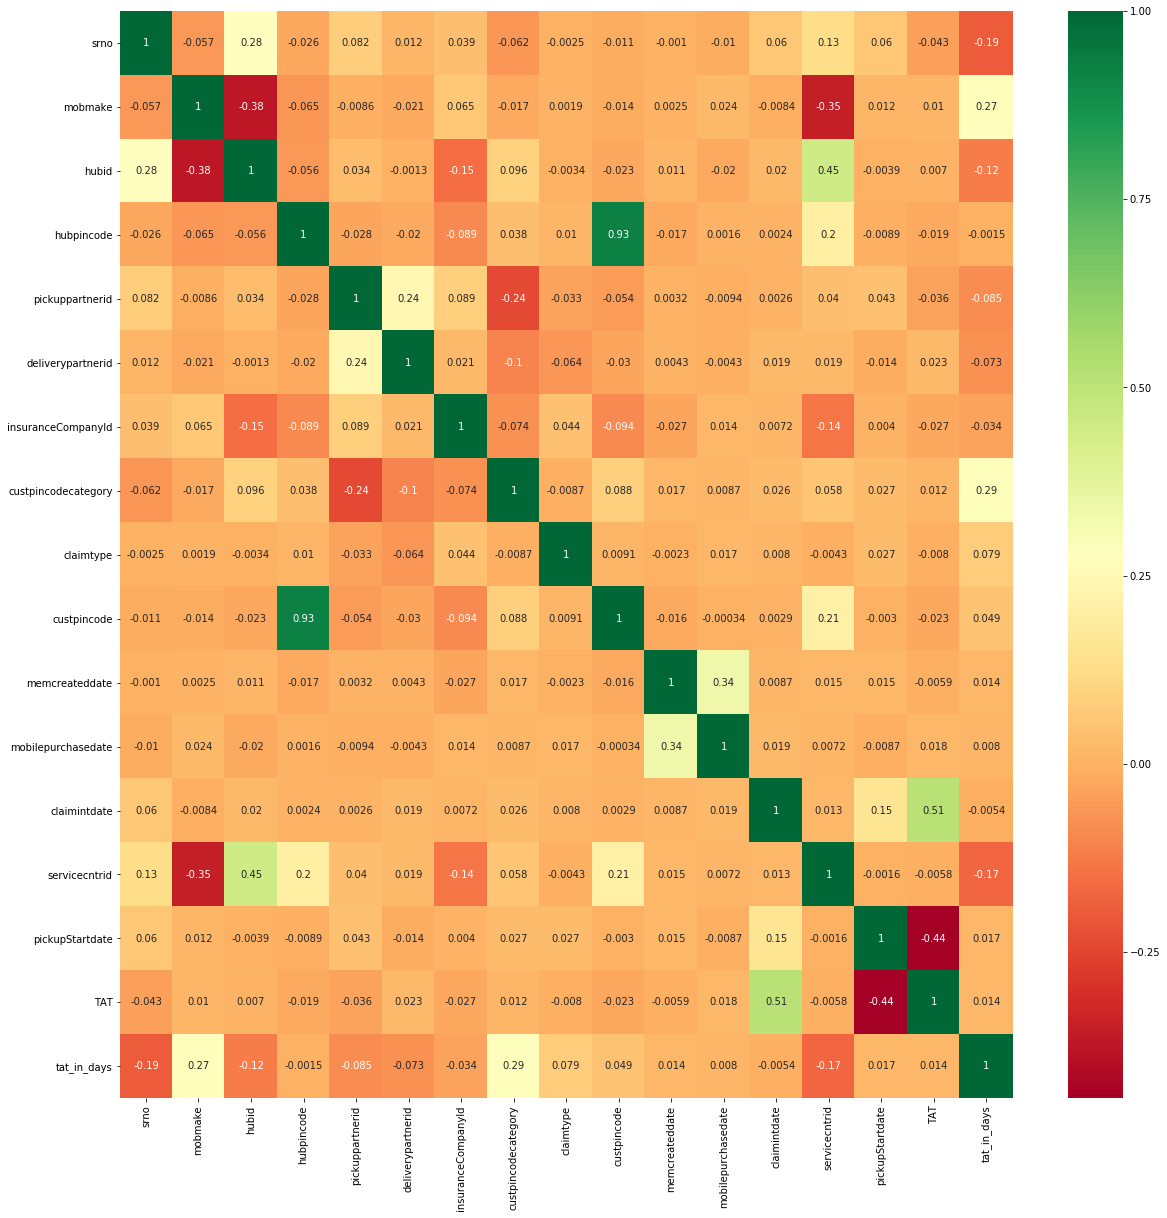

In [13]:
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
train_data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'TAT',
       'tat_in_days'],
      dtype='object')

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
features = ['custpincode','hubpincode','srno','mobmake','servicecntrid','claimtype','custpincodecategory','hubid']

In [17]:
X = train_data[features]
y = train_data.tat_in_days
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [19]:
m=mean_squared_error(y_test, y_pred)
print('RMSE: ', np.sqrt(m))

RMSE:  4.744849679900148


In [20]:
#linreg.score(X_test, y_test)

<h2>Another method to find RMSE</h2>

In [40]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
y_train = y_train.values.reshape(-1, 1)
y_test  = y_test.values.reshape(-1, 1)

y_scaler = StandardScaler()
# Fit on training set only.
y_scaler.fit(y_train)

# Apply transform to both the training set and the test set.
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [23]:
from sklearn import linear_model

In [24]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',model_score)
y_predicted = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

coefficient of determination R^2 of the prediction.:  0.20528422089223308
Mean squared error: 0.90
Test Variance score: 0.20


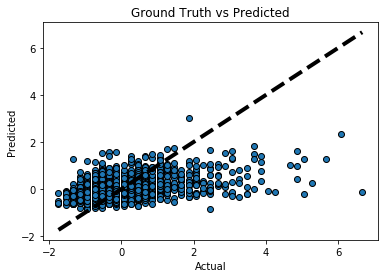

In [26]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [27]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators = 100) #random forest model
# model.fit(X_train, y_train)  #now fit model for training data
# prediction = model.predict(X_test)  #predict for test data
# metrics.accuracy_score(prediction, y_test)

In [28]:
test_data = pd.read_csv('problem_2_test.csv', parse_dates=['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'])

In [29]:
test_data['memcreateddate'] = test_data['memcreateddate'].dt.month
test_data['mobilepurchasedate'] = test_data['mobilepurchasedate'].dt.month
test_data['claimintdate'] = test_data['claimintdate'].dt.month
test_data['pickupStartdate'] = test_data['pickupStartdate'].dt.month

In [30]:
# y_train = y_train.values.reshape(-1, 1)
# y_test  = y_test.values.reshape(-1, 1)

# y_scaler = StandardScaler()
# # Fit on training set only.
# y_scaler.fit(y_train)

# # Apply transform to both the training set and the test set.
# y_train = y_scaler.transform(y_train)
# y_test = y_scaler.transform(y_test)

In [31]:
claims = {'ADLD': 0, 'EW': 1}
test_data['claimtype'] = test_data['claimtype'].map(claims)

In [32]:
xx = test_data.mobmake.unique()
mobiless = {}
i = 0
for mob in xx:
    mobiless[mob] = i
    i+=1


In [33]:
test_data['mobmake'] = test_data['mobmake'].map(mobiless)

In [34]:
custpin = {'A': 0, 'B': 1, 'C': 2, 'D': 3, '0': 4}
test_data['custpincodecategory'] = test_data['custpincodecategory'].map(custpin)

In [35]:
newX = test_data[features]

In [36]:

# scaler = StandardScaler()
# # Fit on training set only.
# scaler.fit(newX)

# # Apply transform to both the training set and the test set.
# newX = scaler.transform(newX)

In [37]:
ms = linreg.predict(newX)
test_data['tat_in_days'] = ms
ms

array([12.35630732, 12.5332817 , 14.8900288 , ..., 12.5982168 ,
       11.18438392, 11.19003033])

In [38]:
test_data.to_csv('problem2_new_test.csv')